[array([0.22057001, 0.18365062, 0.21117318, ..., 0.14968153, 0.22543353,
       0.18142857]), array([0.56009913, 0.5968645 , 0.56312849, ..., 0.54936306, 0.47976879,
       0.48571429]), array([0.11028501, 0.11646137, 0.16536313, ..., 0.09076433, 0.06936416,
       0.08      ]), array([0.07063197, 0.05263158, 0.02122905, ..., 0.06050955, 0.18689788,
       0.16142857])]
[0.20882726 0.54842586 0.11969499 0.07216391]
[[ 0.00134613 -0.00097351 -0.00017263  0.00044889]
 [-0.00097351  0.00496758 -0.00068206 -0.00152716]
 [-0.00017263 -0.00068206  0.00254317 -0.00115244]
 [ 0.00044889 -0.00152716 -0.00115244  0.0021029 ]]
[[ 1.         -0.37646539 -0.09329959  0.26679878]
 [-0.37646539  1.         -0.19189497 -0.47250081]
 [-0.09329959 -0.19189497  1.         -0.49833649]
 [ 0.26679878 -0.47250081 -0.49833649  1.        ]]
         ID        PT        FT        SF        UN
0     23905  0.220570  0.560099  0.110285  0.070632
1     23906  0.183651  0.596865  0.116461  0.052632
2     23907  0.

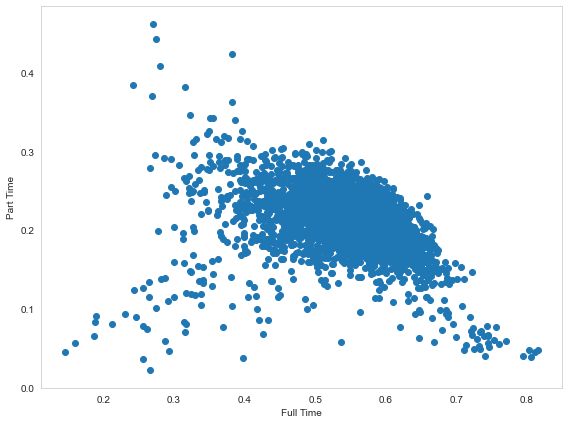

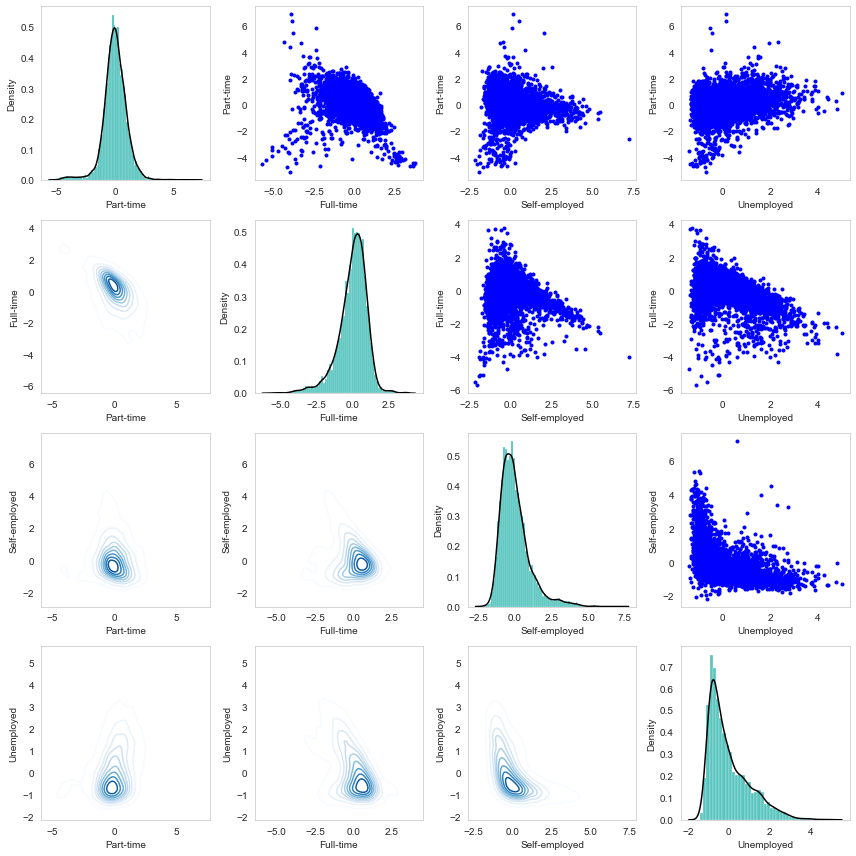

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 15 10:38:21 2021

@author: jobbo
"""

# Basic numerics
import numpy as np
import scipy.stats as st

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

import os
if not os.path.exists('Figures'):
    os.makedirs('Figures')

seabornVersionStr = sns.__version__ # e.g. 0.11.0
versionStrParts = seabornVersionStr.split('.')

ID,PT,FT,SF,UN = np.loadtxt(open("./data.csv"), unpack=True, delimiter=',', skiprows=1)
X = [PT,FT,SF,UN]
print(X)

# summary stats
xbar = np.mean(X, axis=1) # axis=1 means "Take means down columns"
print(xbar)

S = np.cov(X)
print(S)

R = np.corrcoef(X)
print(R)

import pandas as pd

colNames = ["ID","PT","FT","SF","UN"]
sum_data = pd.read_table("C:\\Users\\jobbo\\OneDrive\\MSc Data Science(AUA)\\StasAndML\\coursework\\coursework1-EDA\\data2.csv", sep=',', names=colNames)
print(sum_data)
print(sum_data.describe())

# visualization
# Scatterplot
plt.figure(figsize=(8,6))
plt.scatter(FT,PT)
plt.xlabel('Full Time')
plt.ylabel('Part Time')
plt.tight_layout()
plt.savefig('Figures/full-part.pdf',format='pdf')

# pair plots
names = ['Part-time','Full-time','Self-employed','Unemployed']
X = np.array(X)
X = X.T

def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data-mu)/sigma

X = standardization(X)

nDataSets = 4
plt.figure(figsize=(12,12))
for i in range(0,nDataSets):
    for j in range(0,nDataSets):
        plt.subplot(nDataSets, nDataSets,1+i+(nDataSets*j))
        if i==j:
            # Draw histograms and KDEs on the diagonal using
            # whichever version of Seaborn command is appropriate
            seabornVersionStr = sns.__version__
            versionStrParts = seabornVersionStr.split('.')
            if( int(versionStrParts[1]) < 11 ):
                # Use the older, now-deprectaed form
                sns.distplot(X[:,i],color="b")
            else:
                # Use the more recet form
                sns.kdeplot( X[:,i], color="black", label="Kernel Density")
                sns.histplot( X[:,i], stat="density", color = "lightseagreen" )
                
            # Add labels
            plt.xlabel(names[i])
            plt.ylabel('Density')
        else:
            if i<j:
                # Plot two-dimensional KDEs below the diagonal, again
                # taking care to work with older versions of Seaborn
                if( int(versionStrParts[1]) < 11 ):
                    # Use the older form
                    sns.kdeplot(data=np.ravel(X[:,i]), data2=np.ravel(X[:,j]),cmap="Blues") 
                else:
                    # Use the more recent form
                    sns.kdeplot(x=np.ravel(X[:,i]),y=np.ravel(X[:,j]),cmap="Blues")  
                  
            else:
                # Put scatterplots above the diagonal
                plt.scatter(X[:,i],X[:,j],c="b",marker=".") 
            
            # Add labels
            plt.ylabel(names[j])
            plt.xlabel(names[i])
            
plt.tight_layout()
plt.savefig('Figures/plotmatrices.pdf',format='pdf')
plt.show()
